# CUSTOMER CONVERSION PROBABILITY MODEL

### Importing the right libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

### Reading the CSV data

In [2]:
df = pd.read_csv(r'C:\Users\timil\OneDrive\Desktop\MY CV\digital_marketing_campaign_dataset.csv')
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [3]:
df = df.drop('CustomerID', axis = 1)

### Distribution of classes

<AxesSubplot:>

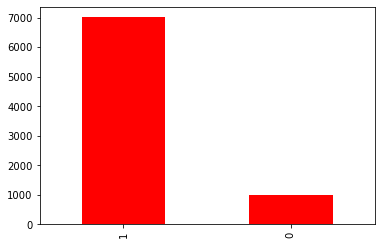

In [4]:
df['Conversion'].value_counts().plot(
kind = 'bar', color = 'red')

### Feature Engineering and Selecting target class

In [5]:
X = df[['Age', 'Income', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases']]
y = df['Conversion']

## Resampling the data 

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
sm = SMOTE(sampling_strategy = 'auto', random_state = 42)

In [8]:
X_resampled, y_resampled = sm.fit_resample(X,y)

C:\Users\timil\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<AxesSubplot:>

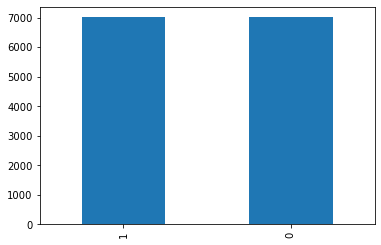

In [9]:
y_resampled.value_counts().plot(kind ='bar')

### Splitting dataset into training and testing classes

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.2, random_state = 42)

### Instantiating the model

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred = model.predict(X_test)

In [26]:
model.score(X_train,y_train)

1.0

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1377
           1       0.90      0.86      0.88      1428

    accuracy                           0.88      2805
   macro avg       0.88      0.88      0.88      2805
weighted avg       0.88      0.88      0.88      2805



In [28]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [29]:
accuracy = accuracy_score (y_pred, y_test)
print (f'The accuracy score is {accuracy:.2f}')

The accuracy score is 0.88


In [30]:
from sklearn.metrics import mean_absolute_error

In [19]:
MAE = mean_absolute_error(y_test, y_pred)
print('The mean absolute error =', MAE)

The mean absolute error = 0.1025


### Saving the model

In [31]:
import joblib

In [32]:
joblib.dump(model, 'marketing_predictor3.joblib')

['marketing_predictor3.joblib']